# For Previous_Application Dataset

In [1]:
#Packages required
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#2.Extract Application_DataSet that contains information of customer at the time of application
#app1=pd.read_csv("D:/Swati/UpGrad/Credit EDA Case Study-20211122T093717Z-001/Credit EDA Case Study/application_data.csv")
preapp1=pd.read_csv("D:/Swati/UpGrad/Credit EDA Case Study-20211122T093717Z-001/Credit EDA Case Study/previous_application.csv")

In [3]:
#Number of Records#
preapp1.shape 

(1670214, 37)

In [4]:
#Verify the Datatype if any conversion required.
preapp1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 37 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   SK_ID_PREV                   1670214 non-null  int64  
 1   SK_ID_CURR                   1670214 non-null  int64  
 2   NAME_CONTRACT_TYPE           1670214 non-null  object 
 3   AMT_ANNUITY                  1297979 non-null  float64
 4   AMT_APPLICATION              1670214 non-null  float64
 5   AMT_CREDIT                   1670213 non-null  float64
 6   AMT_DOWN_PAYMENT             774370 non-null   float64
 7   AMT_GOODS_PRICE              1284699 non-null  float64
 8   WEEKDAY_APPR_PROCESS_START   1670214 non-null  object 
 9   HOUR_APPR_PROCESS_START      1670214 non-null  int64  
 10  FLAG_LAST_APPL_PER_CONTRACT  1670214 non-null  object 
 11  NFLAG_LAST_APPL_IN_DAY       1670214 non-null  int64  
 12  RATE_DOWN_PAYMENT            774370 non-nu

In [5]:
preapp1.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,...,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,...,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,...,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,...,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,...,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,...,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN


#### Missing Value Treatment

In [10]:
#Before Treating for missing value we see few of the missing values mentioned as XNA and XAP.Replacing with NAN
preapp1.replace('XNA',np.nan,inplace=True)
preapp1.replace('XAP',np.nan,inplace=True)

In [11]:
#Check for missing Values
missing_col=((preapp1.isnull().sum()/len(preapp1))*100).sort_values(ascending=False)
missing_col,missing_col.mean()

(RATE_INTEREST_PRIMARY          99.643698
 RATE_INTEREST_PRIVILEGED       99.643698
 NAME_CASH_LOAN_PURPOSE         95.830774
 CODE_REJECT_REASON             81.327123
 NAME_PRODUCT_TYPE              63.684414
 NAME_GOODS_CATEGORY            56.927376
 AMT_DOWN_PAYMENT               53.636480
 RATE_DOWN_PAYMENT              53.636480
 NAME_SELLER_INDUSTRY           51.234153
 NAME_TYPE_SUITE                49.119754
 NFLAG_INSURED_ON_APPROVAL      40.298129
 DAYS_LAST_DUE                  40.298129
 DAYS_LAST_DUE_1ST_VERSION      40.298129
 DAYS_FIRST_DUE                 40.298129
 DAYS_FIRST_DRAWING             40.298129
 DAYS_TERMINATION               40.298129
 NAME_PAYMENT_TYPE              37.563091
 NAME_YIELD_GROUP               30.966990
 AMT_GOODS_PRICE                23.081773
 AMT_ANNUITY                    22.286665
 CNT_PAYMENT                    22.286366
 NAME_PORTFOLIO                 22.286366
 NAME_CLIENT_TYPE                0.116213
 NAME_CONTRACT_TYPE              0

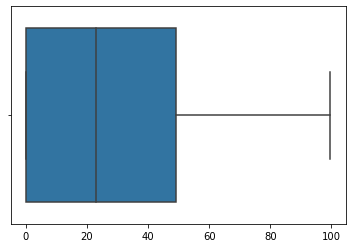

In [12]:
sns.boxplot(missing_col) # Since the avg missing values are 24% and max around 70%.Looking on the boxplot to check 
#the spread of missing values,we can delete columns with more than 40%

In [14]:
#Drop the columns having missing value more than 40%
cols_to_del=missing_col[missing_col>=40]
preapp2=preapp1.drop(cols_to_del.index,axis=1)
preapp2.shape

(1670214, 21)

In [15]:
#Check for the columns with missing value less than 40%
missing_col=((preapp2.isnull().sum()/len(preapp2))*100).sort_values(ascending=False)
missing_col[missing_col>0]

NAME_PAYMENT_TYPE      37.563091
NAME_YIELD_GROUP       30.966990
AMT_GOODS_PRICE        23.081773
AMT_ANNUITY            22.286665
CNT_PAYMENT            22.286366
NAME_PORTFOLIO         22.286366
NAME_CLIENT_TYPE        0.116213
PRODUCT_COMBINATION     0.020716
NAME_CONTRACT_TYPE      0.020716
AMT_CREDIT              0.000060
dtype: float64

In [16]:
#For missing value treatment,For numeric columns we can replace with mean and for categorical with mode.
#Seggregate the columns into numercial and cate gorical
num=preapp2._get_numeric_data().columns
cat=preapp2.select_dtypes(include=['object']).columns

In [17]:
#Replace mising numeric with median
for set in num:
    preapp2[set]=preapp2[set].fillna(preapp2[set].median())

#Replace missing categorical with mode
for set in cat:
    preapp2[set]=preapp2[set].fillna(preapp2[set].mode()[0])

In [18]:
((preapp2.isnull().sum()/len(preapp2))*100).sort_values(ascending=False)

PRODUCT_COMBINATION            0.0
FLAG_LAST_APPL_PER_CONTRACT    0.0
SK_ID_CURR                     0.0
NAME_CONTRACT_TYPE             0.0
AMT_ANNUITY                    0.0
AMT_APPLICATION                0.0
AMT_CREDIT                     0.0
AMT_GOODS_PRICE                0.0
WEEKDAY_APPR_PROCESS_START     0.0
HOUR_APPR_PROCESS_START        0.0
NFLAG_LAST_APPL_IN_DAY         0.0
NAME_YIELD_GROUP               0.0
NAME_CONTRACT_STATUS           0.0
DAYS_DECISION                  0.0
NAME_PAYMENT_TYPE              0.0
NAME_CLIENT_TYPE               0.0
NAME_PORTFOLIO                 0.0
CHANNEL_TYPE                   0.0
SELLERPLACE_AREA               0.0
CNT_PAYMENT                    0.0
SK_ID_PREV                     0.0
dtype: float64

In [19]:
#To Display all columns
pd.set_option('display.max_columns',21)
preapp2.head(10)

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,NAME_CLIENT_TYPE,NAME_PORTFOLIO,CHANNEL_TYPE,SELLERPLACE_AREA,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,17145.0,SATURDAY,15,Y,1,Approved,-73,Cash through the bank,Repeater,POS,Country-wide,35,12.0,middle,POS mobile with interest
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,607500.0,THURSDAY,11,Y,1,Approved,-164,Cash through the bank,Repeater,Cash,Contact center,-1,36.0,low_action,Cash X-Sell: low
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,112500.0,TUESDAY,11,Y,1,Approved,-301,Cash through the bank,Repeater,Cash,Credit and cash offices,-1,12.0,high,Cash X-Sell: high
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,450000.0,MONDAY,7,Y,1,Approved,-512,Cash through the bank,Repeater,Cash,Credit and cash offices,-1,12.0,middle,Cash X-Sell: middle
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,337500.0,THURSDAY,9,Y,1,Refused,-781,Cash through the bank,Repeater,Cash,Credit and cash offices,-1,24.0,high,Cash Street: high
5,1383531,199383,Cash loans,23703.930,315000.0,340573.5,315000.0,SATURDAY,8,Y,1,Approved,-684,Cash through the bank,Repeater,Cash,Credit and cash offices,-1,18.0,low_normal,Cash X-Sell: low
6,2315218,175704,Cash loans,11250.000,0.0,0.0,112320.0,TUESDAY,11,Y,1,Canceled,-14,Cash through the bank,Repeater,POS,Credit and cash offices,-1,12.0,middle,Cash
7,1656711,296299,Cash loans,11250.000,0.0,0.0,112320.0,MONDAY,7,Y,1,Canceled,-21,Cash through the bank,Repeater,POS,Credit and cash offices,-1,12.0,middle,Cash
8,2367563,342292,Cash loans,11250.000,0.0,0.0,112320.0,MONDAY,15,Y,1,Canceled,-386,Cash through the bank,Repeater,POS,Credit and cash offices,-1,12.0,middle,Cash
9,2579447,334349,Cash loans,11250.000,0.0,0.0,112320.0,SATURDAY,15,Y,1,Canceled,-57,Cash through the bank,Repeater,POS,Credit and cash offices,-1,12.0,middle,Cash


In [20]:
#Few of the columns have negative values, negative values have columns starting with Days.
neg_col=[col for col in preapp2.columns if 'DAYS' in col]
neg_col

['DAYS_DECISION']

In [21]:
#Apply abs() to fix the negative value.
preapp2[neg_col]=abs(preapp2[neg_col])
preapp2[neg_col]

,DAYS_DECISION
0,73
1,164
2,301
3,512
4,781
...,...
1670209,544
1670210,1694
1670211,1488
1670212,1185


In [22]:
#Find the true numercial value.Under numericals there can be categorical,
#hence filtering out the true numericals having unique value more than 100.
true_num=[]
for i in num:
    if len(preapp2[i].unique())>100:
        true_num.append(i)
true_num

['SK_ID_PREV',
 'SK_ID_CURR',
 'AMT_ANNUITY',
 'AMT_APPLICATION',
 'AMT_CREDIT',
 'AMT_GOODS_PRICE',
 'DAYS_DECISION',
 'SELLERPLACE_AREA']

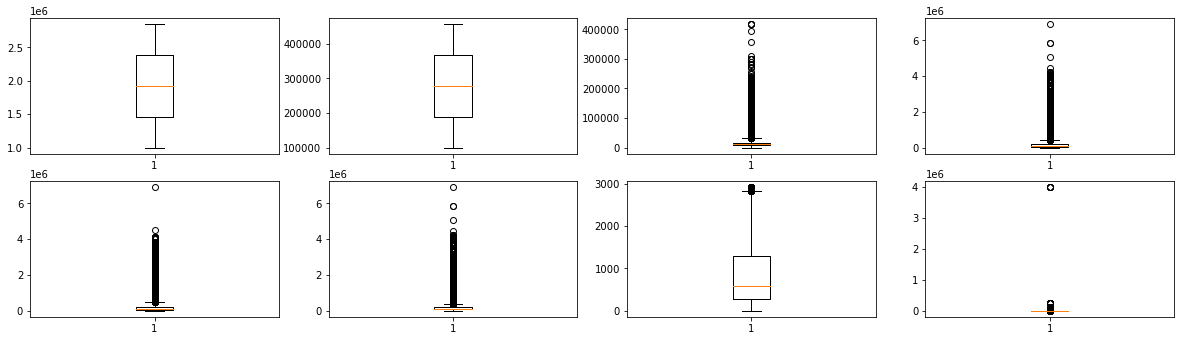

In [24]:
#TO check for outliers for the numeric columns obtained from the above .
fig, ax = plt.subplots(ncols=4, nrows=2)

pre = ax[0][0].boxplot(preapp2['SK_ID_PREV'])

cur = ax[0][1].boxplot(preapp2['SK_ID_CURR'])

annuity = ax[0][2].boxplot(preapp2['AMT_ANNUITY'])

app = ax[0][3].boxplot(preapp2['AMT_APPLICATION'])

credit = ax[1][0].boxplot(preapp2['AMT_CREDIT'])

price = ax[1][1].boxplot(preapp2['AMT_GOODS_PRICE'])

dec = ax[1][2].boxplot(preapp2['DAYS_DECISION'])

are = ax[1][3].boxplot(preapp2['SELLERPLACE_AREA'])

fig.set_size_inches(20.5, 5.5, forward=True)
plt.show()


##### From the above we can conclude  below columns are having outliers.
 AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_GOODS_PRICE,DAYS_DECISION,SELLERPLACE_AREA.Outliers can be treated using IQR.By replacing the max values with 70% IQR and min values with 25% IQR.

In [26]:
#To extract the categorical columns along with their unique value
mocat={i : len(preapp2[i].unique()) for i in cat}
mocat

{'NAME_CONTRACT_TYPE': 3,
 'WEEKDAY_APPR_PROCESS_START': 7,
 'FLAG_LAST_APPL_PER_CONTRACT': 2,
 'NAME_CONTRACT_STATUS': 4,
 'NAME_PAYMENT_TYPE': 3,
 'NAME_CLIENT_TYPE': 3,
 'NAME_PORTFOLIO': 4,
 'CHANNEL_TYPE': 8,
 'NAME_YIELD_GROUP': 4,
 'PRODUCT_COMBINATION': 17}

#### For Univariate Analysis :

In [35]:
##### Defining a function to plot bar chart for categorical variables.
def bplot(col,col1):
    fig, (ax1,ax2) = plt.subplots(1,2,figsize =(23,6))
    sns.countplot(x=col,data=preapp2,order=preapp2[col].value_counts().index,ax=ax1)
    ax1.set_xlabel(col,fontsize=14)
    #ax1.set_title(f'{col} Distribution for Defaulters',fontsize=20)
    ax1.set_xticklabels(ax1.get_xticklabels(), rotation=20, ha="center",fontsize=14)
    
    for p in ax1.patches:
        ax1.annotate('{:.2f}%'.format((p.get_height()/len(preapp2))*100), (p.get_x()+0.25, p.get_height()+100),fontsize=14)
    
    sns.countplot(x=col1,data=preapp2,order=preapp2[col1].value_counts().index,ax=ax2)
    ax2.set_xlabel(col1,fontsize=14)
    #ax2.set_title(f'{col1} Distribution for Defaulters',fontsize=20)
    ax2.set_xticklabels(ax2.get_xticklabels(), rotation=20, ha="center",fontsize=14)
    
    for p in ax2.patches:
        ax2.annotate('{:.1f}%'.format((p.get_height()/len(preapp2))*100), (p.get_x()+0.25, p.get_height()+100),fontsize=14)
   

    plt.show()

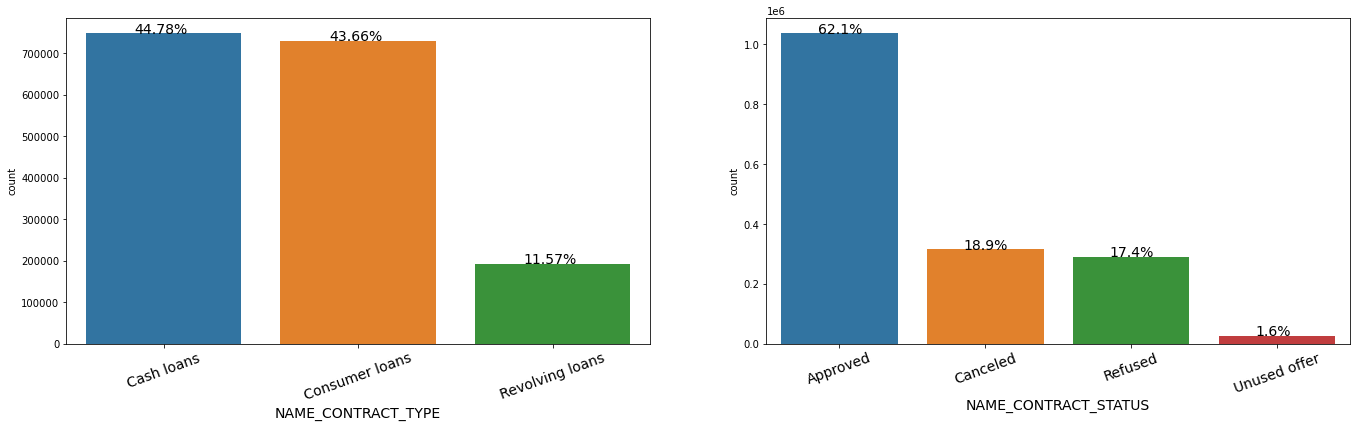

In [36]:
bplot('NAME_CONTRACT_TYPE','NAME_CONTRACT_STATUS')

#### Majority applying for Cash Loans and Majority of loans are approved and very less percentage of loans are 'Unused offers'.

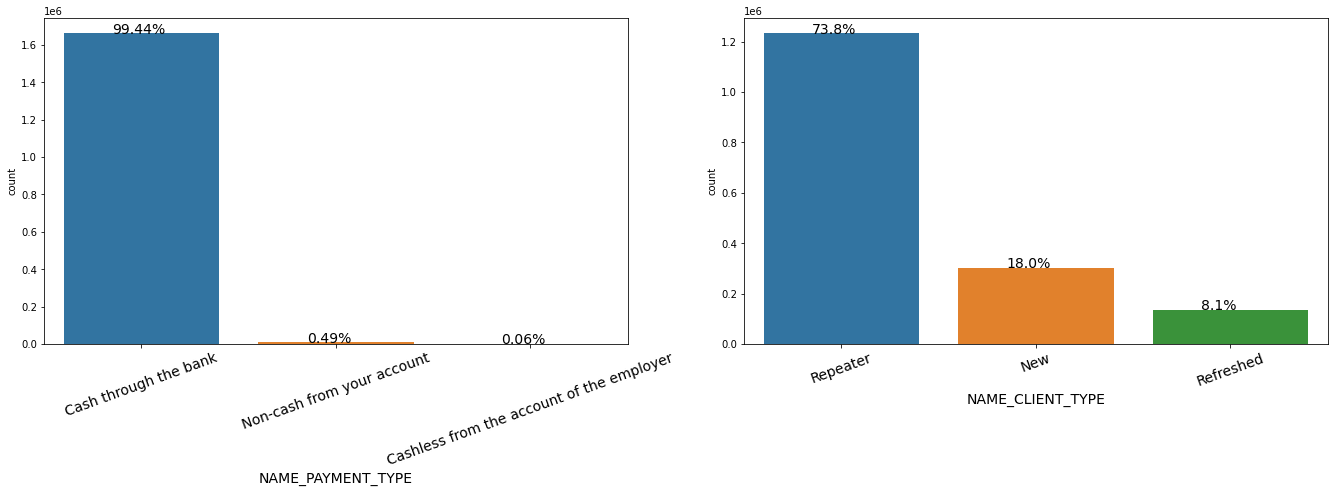

In [37]:
bplot('NAME_PAYMENT_TYPE','NAME_CLIENT_TYPE')

#### 99% choose to pay through banks amd majority of the client were repeater.

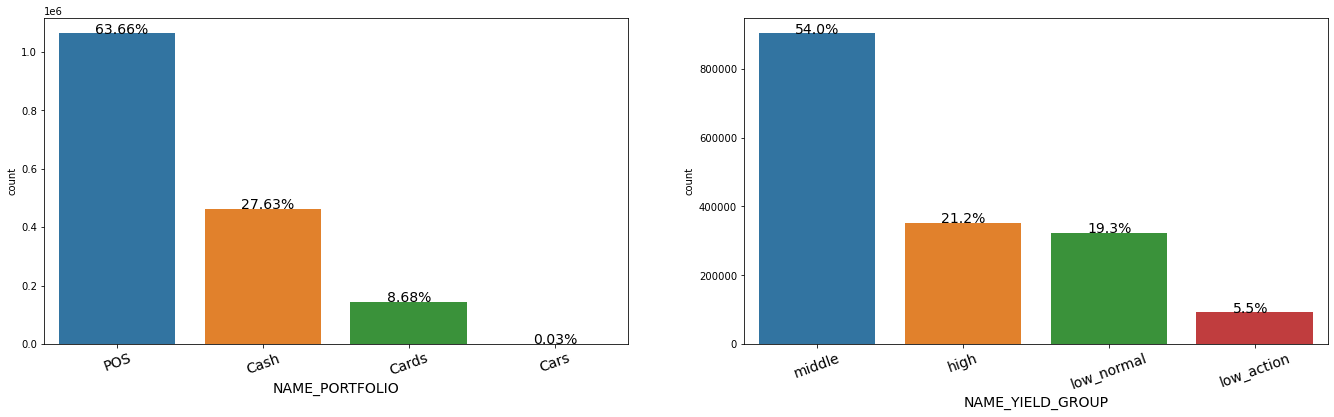

In [39]:
bplot('NAME_PORTFOLIO','NAME_YIELD_GROUP')

#### Majority of previous application is for POS, and for 'Middle' Yield group.

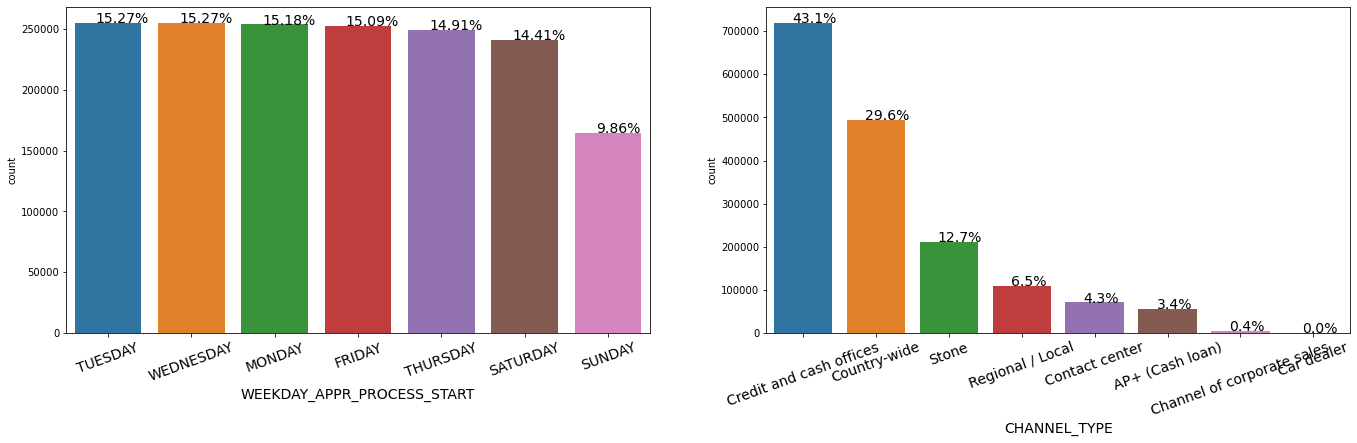

In [45]:
bplot('WEEKDAY_APPR_PROCESS_START','CHANNEL_TYPE')

#### Applicants applying on 'Sunday' are the least. Majority of applicants coming from 'Credit and Cash Offices'

In [60]:
#For categorical columns having more than 7,taking the top 10 ,'OCCUPATION_TYPE': 18,'ORGANIZATION_TYPE': 57}
#Defining a function to plot bar chart for categorical variables.
def more_than_10_bplot(col):
    plt.figure(figsize=[20,5])
    ax1=sns.countplot(x=col,data=preapp2,order=preapp2[col].value_counts().head(10).index)
    ax1.set_xlabel(col,fontsize=14)
    #ax1.set_title(f'{col} Distribution for Defaulters',fontsize=20)
    ax1.set_xticklabels(ax1.get_xticklabels(), rotation=20, ha="center",fontsize=15)
    
    for p in ax1.patches:
        ax1.annotate('{:.2f}%'.format((p.get_height()/len(preapp2))*100), (p.get_x()+0.25, p.get_height()+100),fontsize=15)

    plt.show()

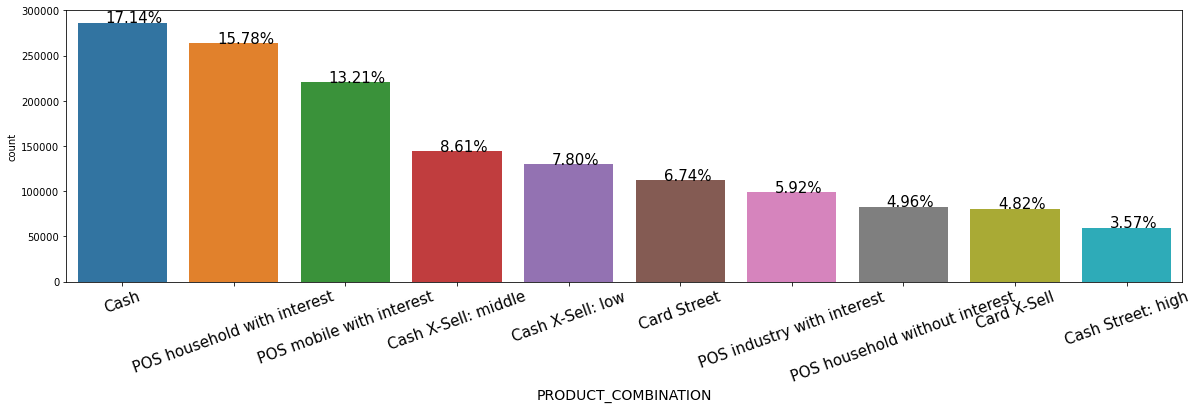

In [61]:
more_than_10_bplot('PRODUCT_COMBINATION')

#### Majority of loans applied for Cash and good amount for 'POS household with interest'.

### To find top 10 correlation

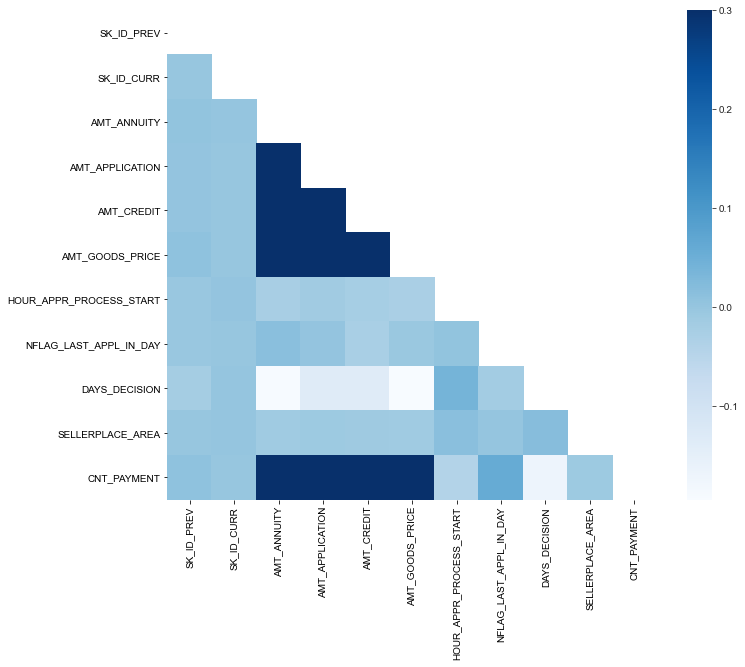

In [64]:
#Using Heatmap to find to correlation
corr = preapp2[monum].corr()
msk = np.zeros_like(corr)
msk[np.triu_indices_from(msk)] = True
f, ax = plt.subplots(figsize=(11,9))
with sns.axes_style("white"):
    ax = sns.heatmap(corr, mask=msk, vmax=0.3, square=True,cmap = "Blues")
    plt.show()

In [66]:
#Extracting the top 10 correlated variables
corr1 = preapp2[monum].corr().abs().unstack().sort_values(ascending=False).dropna()
corr1[corr1 !=1.0].head(20)

AMT_GOODS_PRICE  AMT_APPLICATION    0.987143
AMT_APPLICATION  AMT_GOODS_PRICE    0.987143
                 AMT_CREDIT         0.975824
AMT_CREDIT       AMT_APPLICATION    0.975824
                 AMT_GOODS_PRICE    0.971117
AMT_GOODS_PRICE  AMT_CREDIT         0.971117
                 AMT_ANNUITY        0.816293
AMT_ANNUITY      AMT_GOODS_PRICE    0.816293
                 AMT_CREDIT         0.811670
AMT_CREDIT       AMT_ANNUITY        0.811670
AMT_ANNUITY      AMT_APPLICATION    0.805558
AMT_APPLICATION  AMT_ANNUITY        0.805558
                 CNT_PAYMENT        0.681114
CNT_PAYMENT      AMT_APPLICATION    0.681114
                 AMT_GOODS_PRICE    0.676007
AMT_GOODS_PRICE  CNT_PAYMENT        0.676007
CNT_PAYMENT      AMT_CREDIT         0.674387
AMT_CREDIT       CNT_PAYMENT        0.674387
AMT_ANNUITY      CNT_PAYMENT        0.406187
CNT_PAYMENT      AMT_ANNUITY        0.406187
dtype: float64

In [90]:
##Merging both the dataset
app1=pd.read_csv("D:/Swati/UpGrad/Credit EDA Case Study-20211122T093717Z-001/Credit EDA Case Study/application_data.csv")
cur_app=app1[['SK_ID_CURR','TARGET']]
cur_app

,SK_ID_CURR,TARGET
0,100002,1
1,100003,0
2,100004,0
3,100006,0
4,100007,0
...,...,...
307506,456251,0
307507,456252,0
307508,456253,0
307509,456254,1


In [91]:
merge_data=cur_app.merge(preapp2,on='SK_ID_CURR',how='inner')
merge_data.shape

(1413701, 22)

In [93]:
#Since we need to analyse regarding the defaulters, dividing the dataset into 2 separate dataset to compare.
amerge_data=merge_data[merge_data['TARGET']==1]
nmerge_data=merge_data[merge_data['TARGET']==0]

In [99]:
#Distribution 
def biplot(col1,col2,col3):
    fig, (ax1,ax2) = plt.subplots(1,2,figsize =(26,6))
    sns.countplot(data = amerge_data, x=col1,order=amerge_data[col1].value_counts().index,hue =col2,ax=ax1)
    ax1.set_xlabel(col1,fontsize=13)
    #ax1.set_title(f'% of Loan Difficulties having {t1}',fontsize=15)
    ax1.set_xticklabels(ax1.get_xticklabels(), rotation=20 ,ha="center",fontsize=15)
    
    for p in ax1.patches:
        ax1.annotate('{:.2f}%'.format((p.get_height()/len(merge_data))*100), (p.get_x()+0.15, p.get_height()+100),fontsize=13)
    
    sns.countplot(data = amerge_data, x=col1,order=amerge_data[col1].value_counts().index,hue =col3,ax=ax2)
    ax2.set_xlabel(col1,fontsize=13)
    #ax2.set_title(f'% of Loan Difficulties having {t2}',fontsize=15)
    ax2.set_xticklabels(ax1.get_xticklabels(), rotation=20,ha="center",fontsize=15)
    
    for p in ax2.patches:
        ax2.annotate('{:.1f}%'.format((p.get_height()/len(amerge_data))*100), (p.get_x()+0.15, p.get_height()+100),fontsize=13)
   

    plt.show()

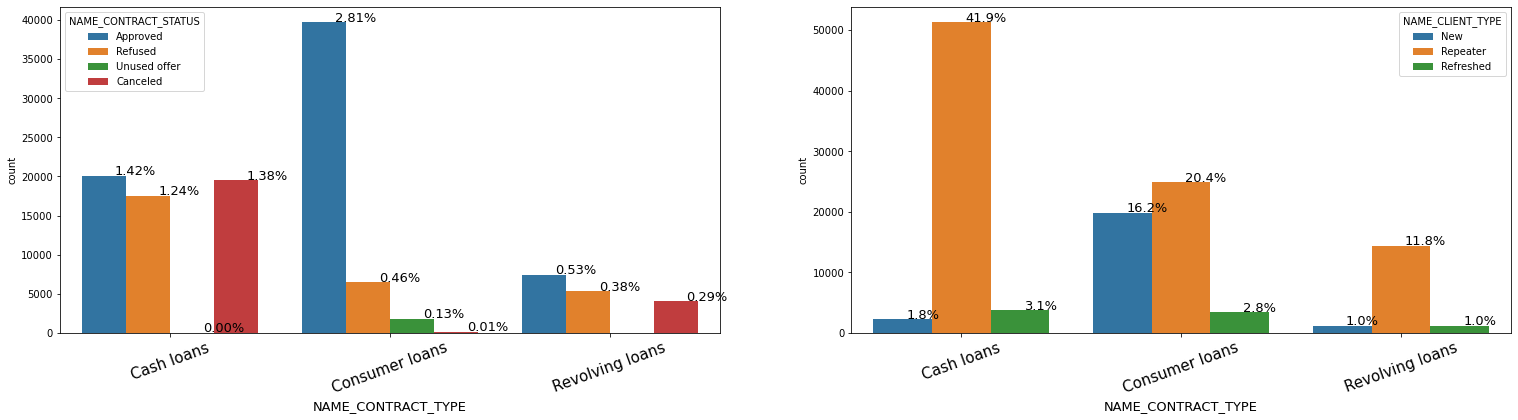

In [101]:
biplot('NAME_CONTRACT_TYPE','NAME_CONTRACT_STATUS','NAME_CLIENT_TYPE')

#### Although for 'Cash Loan ' type % of difficulties is more,but 'Consumer Loan' type with 'Approved' Contract status have maximum majority of Loan Difficulties.
#### Also the 'Cash Loan' type with 'Repeated' Customer have more Loan Difficulties.

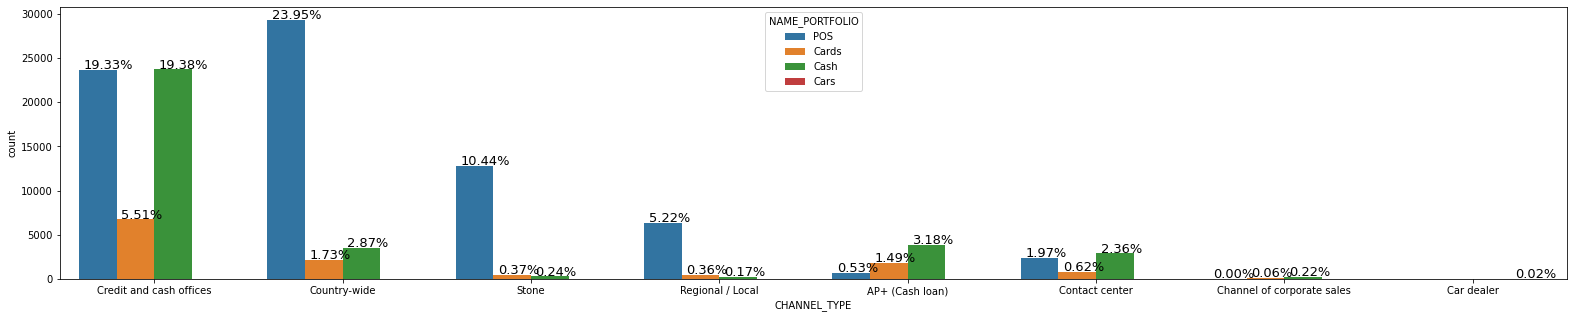

In [110]:
#biplot('CHANNEL_TYPE' Vs 'NAME_PORTFOLIO')
plt.figure(figsize=[27,5])
ax=sns.countplot(data = amerge_data, x='CHANNEL_TYPE',order=amerge_data['CHANNEL_TYPE'].value_counts().index,hue ='NAME_PORTFOLIO')

for p in ax.patches:
        ax.annotate('{:.2f}%'.format((p.get_height()/len(amerge_data))*100), (p.get_x()+0.025, p.get_height()+100),fontsize=13)

#### % of Loan Difficulty more for 'Country-wide'Channel type for 'POS' portfolio

In [125]:
#Since during missing value treatment,many columns were removed.Hence merging both the original set with missing value
merge_data1=cur_app.merge(preapp1,on='SK_ID_CURR',how='inner')
merge_data1.shape
amerge_data1=merge_data1[merge_data1['TARGET']==1]

In [126]:
def more_than_10_bplot(col,col2):
    fig, (ax1,ax2) = plt.subplots(1,2,figsize =(37,12))
    sns.countplot(x=col,data=amerge_data1,order=amerge_data1[col].value_counts().head(10).index,ax=ax1)
    ax1.set_xlabel(col,fontsize=14)
    ax1.set_title(f'{col} Distribution for Defaulters',fontsize=20)
    ax1.set_xticklabels(ax1.get_xticklabels(), rotation=20, ha="center",fontsize=15)
    
    for p in ax1.patches:
        ax1.annotate('{:.2f}%'.format((p.get_height()/len(amerge_data1))*100), (p.get_x()+0.25, p.get_height()+100),fontsize=15)
    
    sns.countplot(x=col2,data=amerge_data1,order=amerge_data1[col2].value_counts().head(10).index,ax=ax2)
    ax2.set_xlabel(col2,fontsize=14)
    ax2.set_title(f'{col2} Distribution for Defaulters',fontsize=20)
    ax2.set_xticklabels(ax2.get_xticklabels(), rotation=20, ha="center",fontsize=15)
    
    for p in ax2.patches:
        ax2.annotate('{:.1f}%'.format((p.get_height()/len(amerge_data1))*100), (p.get_x()+0.25, p.get_height()+100),fontsize=15)
   

    plt.show()

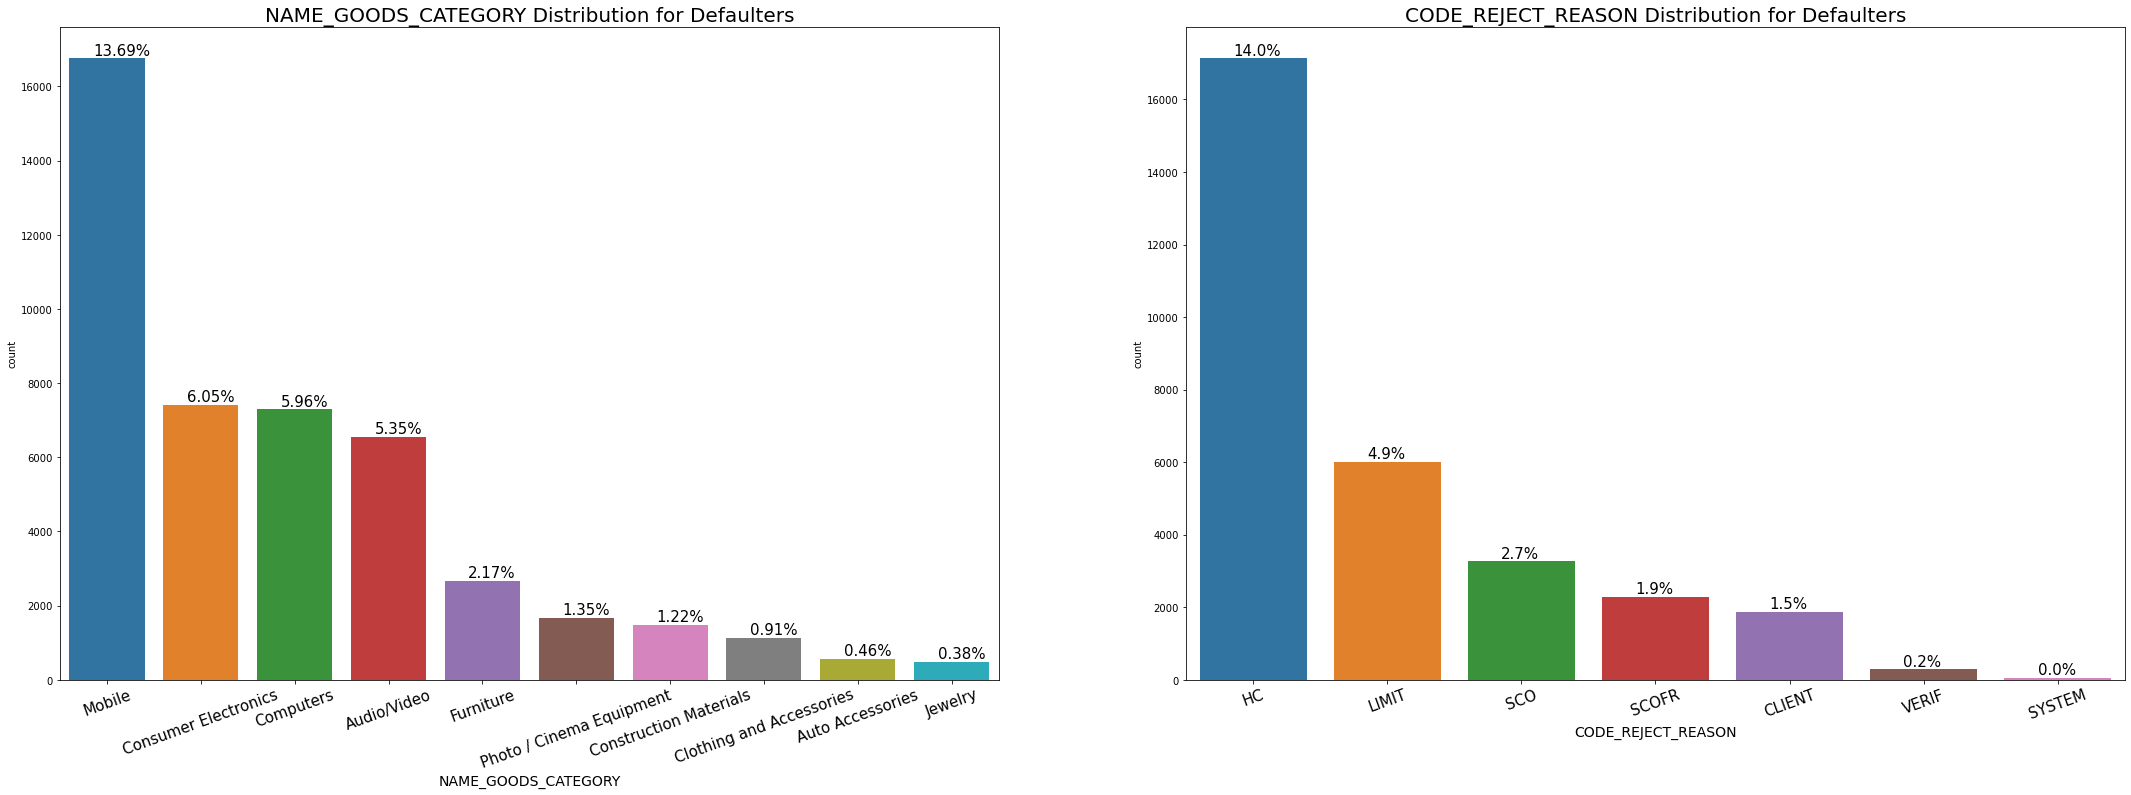

In [127]:
more_than_10_bplot('NAME_GOODS_CATEGORY','CODE_REJECT_REASON')

####  Majority of loans for mobile have more % of Loan difficulty.HC is the reason majority of applications got rejetced.

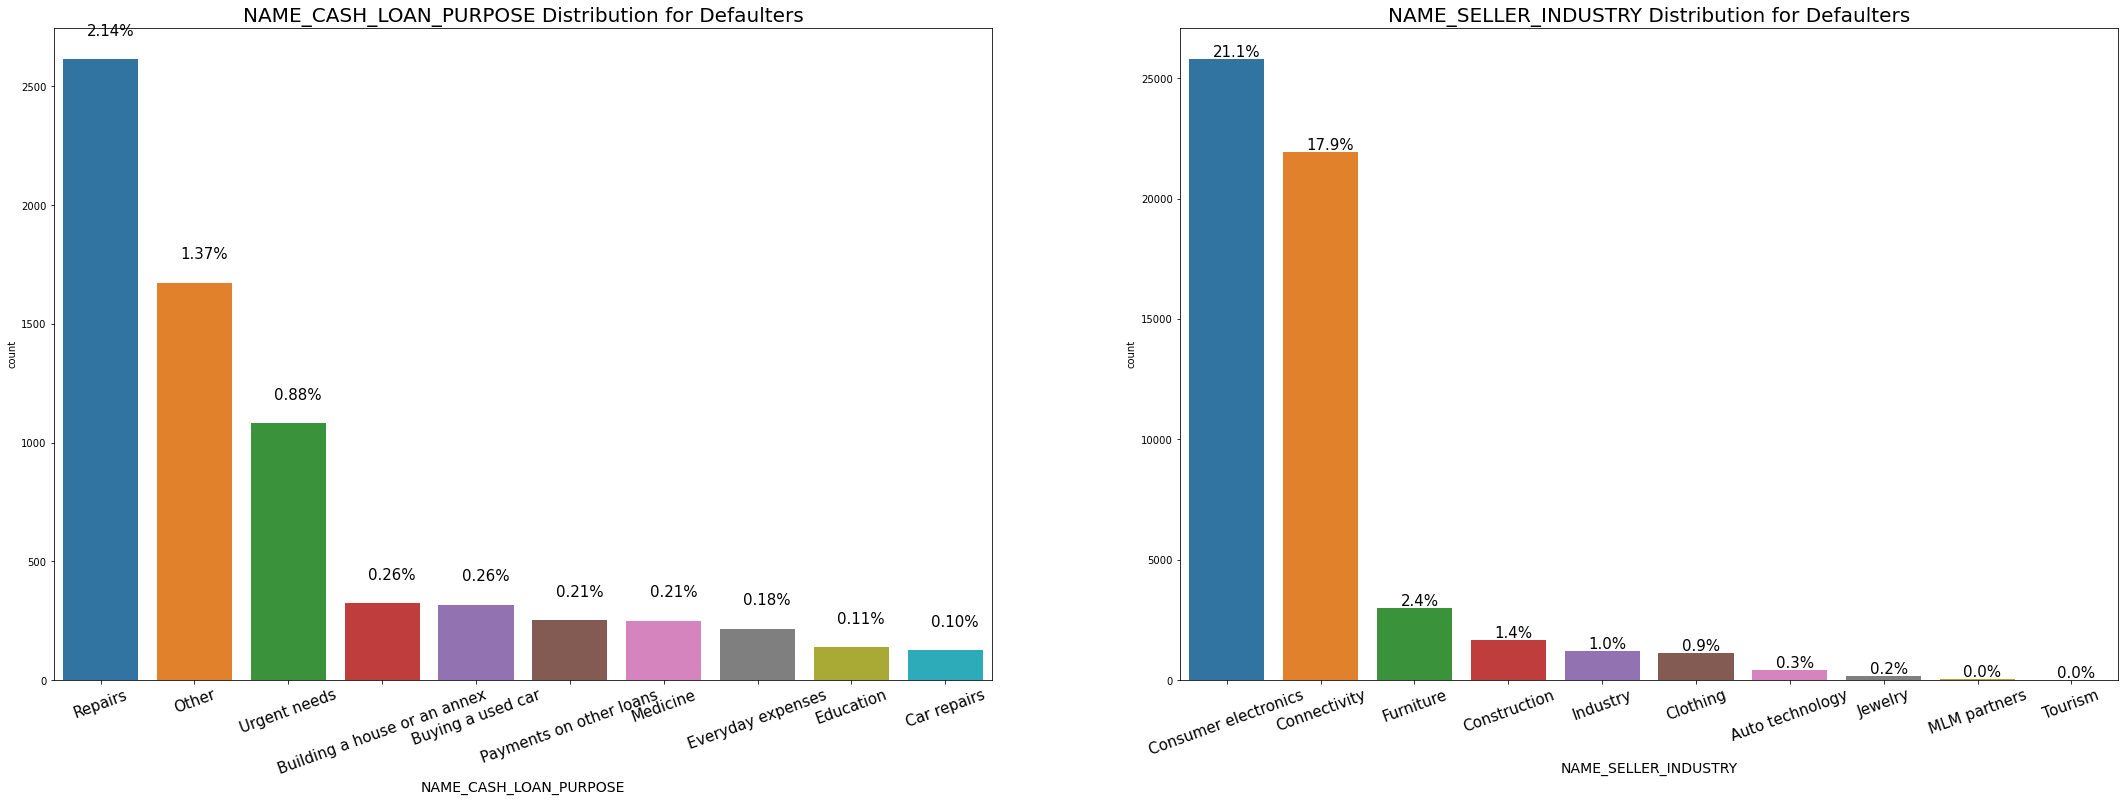

In [128]:
more_than_10_bplot('NAME_CASH_LOAN_PURPOSE','NAME_SELLER_INDUSTRY')

####  Purpose of cash loan  for 'Repairs' have more  % of Loan Difficulties.Also 'Consumer Industries' have more Loan difficulties.